# Clustering

https://archive.ics.uci.edu/dataset/109/wine

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('wineblind.csv', index_col=0)

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 13)

Identificar cuántos patrones distintos de vino hay etiquetando cada copa de vino en uno de ellos

1. ¿ Cuántos patrones hay ? == ¿ Cuántos tipos de vino hay?
2. Cada copa, ¿ a qué patrón pertenece?


## Intercambiabilidad de etiquetas

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

In [52]:
from sklearn.metrics import normalized_mutual_info_score as nmi

nmi([0, 1, 1], [1, 0, 0])

1.0

In [53]:
nmi([3, 123, 123], [1, 0, 0])

1.0

In [54]:
nmi([0, 1, 1, 1], [1, 0, 0, 1])

0.3437110184854508

In [55]:
nmi([0, 0, 1, 1], [0, 1, 2, 3])

0.6666666666666666

# TOY TABLE

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

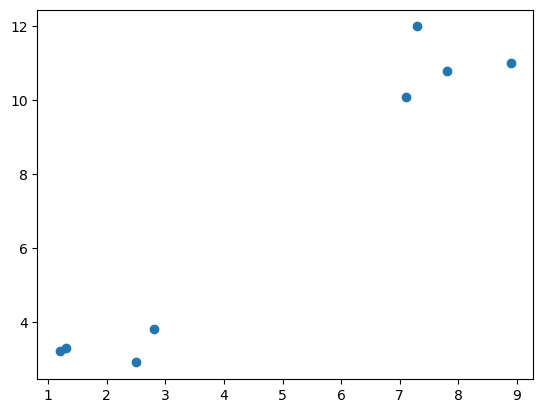

In [8]:
df = pd.DataFrame({
    "x": [1.2, 1.3, 2.8, 2.5, 7.1, 7.8, 8.9, 7.3],
    "y": [3.2, 3.3, 3.8, 2.9, 10.1, 10.8, 11, 12]
}).astype('float')

plt.scatter(df.x, df.y);

In [9]:
df

,x,y
0,1.2,3.2
1,1.3,3.3
2,2.8,3.8
3,2.5,2.9
4,7.1,10.1
5,7.8,10.8
6,8.9,11.0
7,7.3,12.0


In [32]:
kmeans_model = KMeans(n_clusters=2, 
                      n_init=10, 
                      algorithm="elkan")
kmeans_model.fit(df)

KMeans(algorithm='elkan', n_clusters=2)

Un modelo de clustering es mejor conforme la suma de las distancias de los representantes (centroides) a los representados (puntos del cluster), **sea menor**


**La `inertia_` del modelo de KMeans es la suma de las distancias de cada representado a su representante**

Un clustering es mejor mientras inertia_ sea más baja

In [36]:
kmeans_model.inertia_

6.225000000000002

In [11]:
labels = kmeans_model.predict(df)
labels

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [17]:
df['kmeans_labels'] = labels

In [13]:
df

,x,y,kmeans_labels
0,1.2,3.2,0
1,1.3,3.3,0
2,2.8,3.8,0
3,2.5,2.9,0
4,7.1,10.1,1
5,7.8,10.8,1
6,8.9,11.0,1
7,7.3,12.0,1


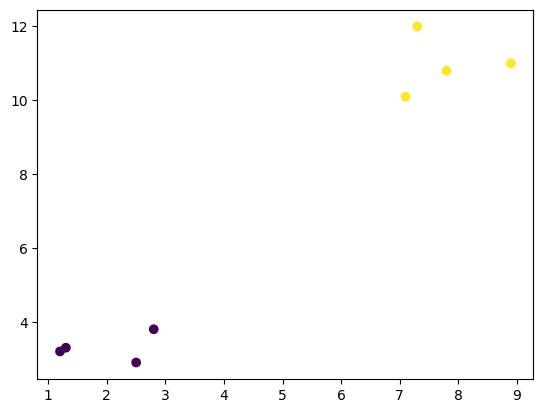

In [19]:
plt.scatter(df.x, df.y, c=df.kmeans_labels);

In [21]:
kmeans_model.cluster_centers_

array([[ 1.95 ,  3.3  ],
       [ 7.775, 10.975]])

In [22]:
df

,x,y,kmeans_labels
0,1.2,3.2,0
1,1.3,3.3,0
2,2.8,3.8,0
3,2.5,2.9,0
4,7.1,10.1,1
5,7.8,10.8,1
6,8.9,11.0,1
7,7.3,12.0,1


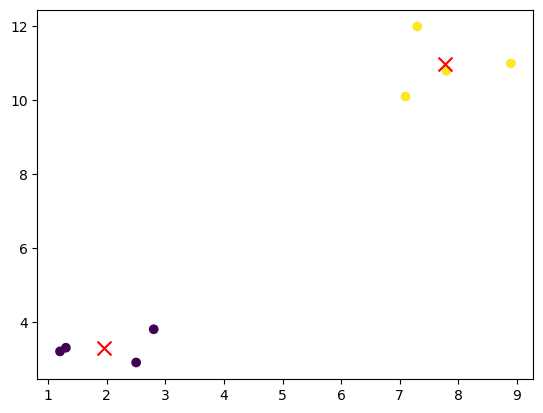

In [31]:
plt.scatter(df.x, df.y, c=df.kmeans_labels);
plt.scatter(kmeans_model.cluster_centers_[:, 0], 
            kmeans_model.cluster_centers_[:, 1], 
            c='red', marker='x', s=100);

## caso extremo en que número de clusters es igual al número de puntos

In [37]:
df.shape

(8, 3)

In [40]:
kmeans_model = KMeans(n_clusters=8, 
                      n_init=10, 
                      algorithm="elkan")
kmeans_model.fit(df)

KMeans(algorithm='elkan')

In [41]:
kmeans_model.inertia_

0.0

In [44]:
df['kmeans_labels'] = kmeans_model.labels_
df

,x,y,kmeans_labels
0,1.2,3.2,7
1,1.3,3.3,1
2,2.8,3.8,4
3,2.5,2.9,6
4,7.1,10.1,2
5,7.8,10.8,5
6,8.9,11.0,3
7,7.3,12.0,0


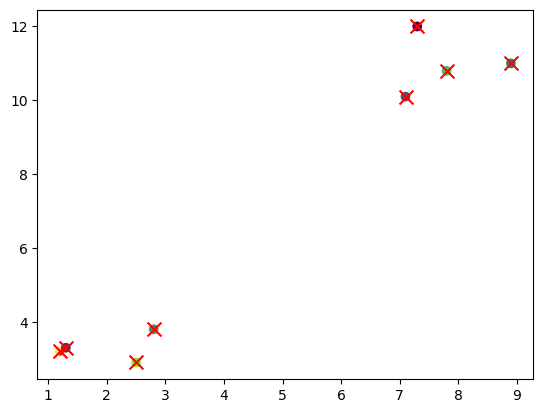

In [45]:
plt.scatter(df.x, df.y, c=df.kmeans_labels);
plt.scatter(kmeans_model.cluster_centers_[:, 0], 
            kmeans_model.cluster_centers_[:, 1], 
            c='red', marker='x', s=100);

## caso extremo en el que solo ponemos un solo grupo

In [46]:
kmeans_model = KMeans(n_clusters=1, 
                      n_init=10, 
                      algorithm="elkan")
kmeans_model.fit(df)

/home/infinitemonkeys/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1325: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='elkan', n_clusters=1)

In [47]:
kmeans_model.inertia_

233.89749999999998

In [48]:
df['kmeans_labels'] = kmeans_model.labels_
df

,x,y,kmeans_labels
0,1.2,3.2,0
1,1.3,3.3,0
2,2.8,3.8,0
3,2.5,2.9,0
4,7.1,10.1,0
5,7.8,10.8,0
6,8.9,11.0,0
7,7.3,12.0,0


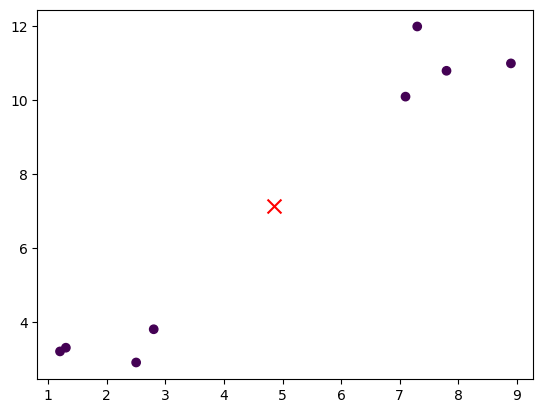

In [49]:
plt.scatter(df.x, df.y, c=df.kmeans_labels);
plt.scatter(kmeans_model.cluster_centers_[:, 0], 
            kmeans_model.cluster_centers_[:, 1], 
            c='red', marker='x', s=100);

In [51]:
kmeans_model.cluster_centers_

array([[4.8625, 7.1375, 3.5   ]])

In [50]:
df.mean()

x                4.8625
y                7.1375
kmeans_labels    0.0000
dtype: float64

Nos interesa obtener la mínima cantidad de grupos posibles que recogen los patrones más relevantes de los datos

# VINOS

Selección número de clusters:
- Inspección visual con PCA
- Criterios estadísticos

In [80]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('wineblind.csv', index_col=0)

In [58]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [188]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

reduction_pipe = Pipeline([
    ('prep', StandardScaler()),
    ('pca', PCA(n_components=2))
])
reduced_df = reduction_pipe.fit_transform(df)

In [75]:
df.shape

(178, 13)

In [76]:
reduced_df.shape

(178, 2)

In [77]:
reduced_df[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

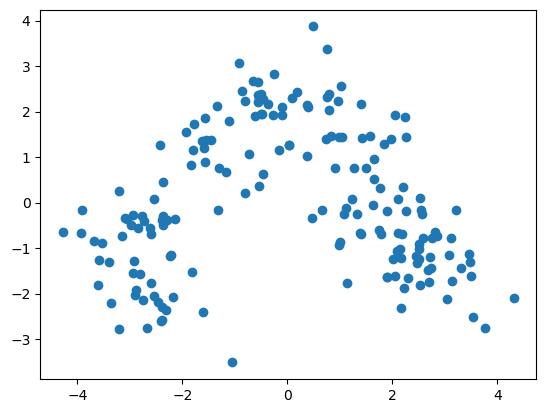

In [78]:
plt.scatter(reduced_df[:, 0], reduced_df[:, 1]);

In [88]:
n_clusters_array = np.arange(1, 9)
n_clusters_array

array([1, 2, 3, 4, 5, 6, 7, 8])

In [89]:
n_clusters_array = np.arange(1, 8)
inertia_list = []

for n_clusters in n_clusters_array:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_model.fit(df)
    inertia = kmeans_model.inertia_
    inertia_list.append(inertia)    

In [90]:
inertia_list

[17592296.38350847,
 4543749.614531861,
 2370689.686782968,
 1333139.2086165315,
 916379.1871539169,
 647326.0020260848,
 412303.8282508013]

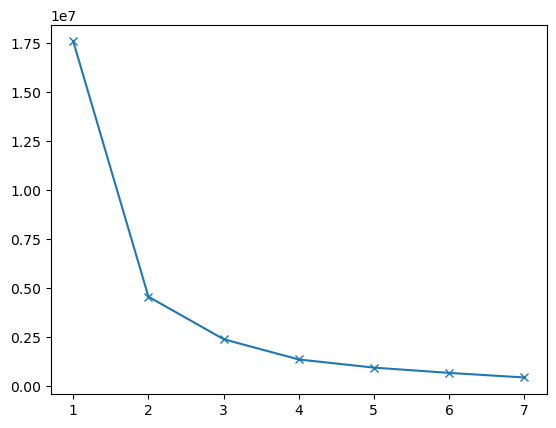

In [93]:
plt.plot(n_clusters_array, inertia_list, 'x-');

**Nos interesa obtener la mínima cantidad de grupos posibles que recogen los patrones más relevantes de los datos**

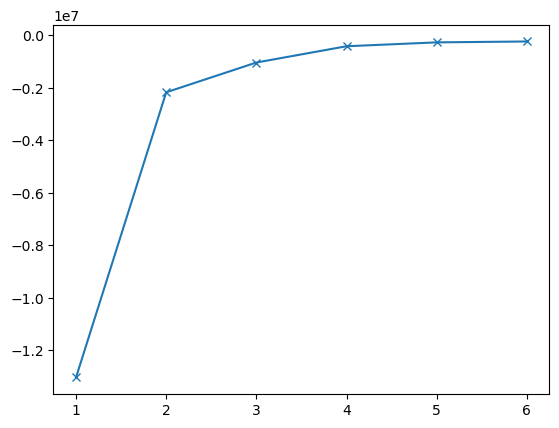

In [97]:
plt.plot(n_clusters_array[:-1], np.diff(inertia_list), 'x-');

In [149]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [132]:
kmeans_model = KMeans(n_clusters=3, n_init=30, algorithm='elkan')
kmeans_model.fit(df)

KMeans(algorithm='elkan', n_clusters=3, n_init=30)

In [173]:
pipe = Pipeline([
    ('prep', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=30, algorithm='elkan'))
])
pipe.fit(df)
labels = pipe.steps[1][1].labels_
labels = pipe.predict(df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [133]:
wine_target_df = pd.read_csv('ywine.csv', header=None, index_col=0)
wine_target_df.shape

(178, 1)

In [174]:
target_var = wine_target_df.iloc[:, 0].values.tolist()
complete_df = df.copy()
complete_df['target_var'] = target_var
complete_df['labels'] = labels

In [175]:
complete_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,target_var,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,0


In [176]:
complete_df.target_var.value_counts()

2    71
1    59
3    48
Name: target_var, dtype: int64

In [177]:
complete_df.labels.value_counts()

2    65
1    62
0    51
Name: labels, dtype: int64

In [178]:
complete_df.groupby(['target_var', 'labels']).target_var.count()

target_var  labels
1           1         59
2           0          3
            1          3
            2         65
3           0         48
Name: target_var, dtype: int64

In [180]:
from sklearn.metrics import normalized_mutual_info_score as nmi

nmi(complete_df.target_var, 
    complete_df.labels)

0.875893534122307

In [187]:
centroids = pipe.steps[1][1].cluster_centers_
centroids

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [193]:
reduced_centroids = reduction_pipe.steps[1][1].transform(centroids)
reduced_centroids.shape

(3, 2)

In [198]:
centroids_in_original_dims = pd.DataFrame(pipe.steps[0][1].inverse_transform(centroids))
centroids_in_original_dims

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


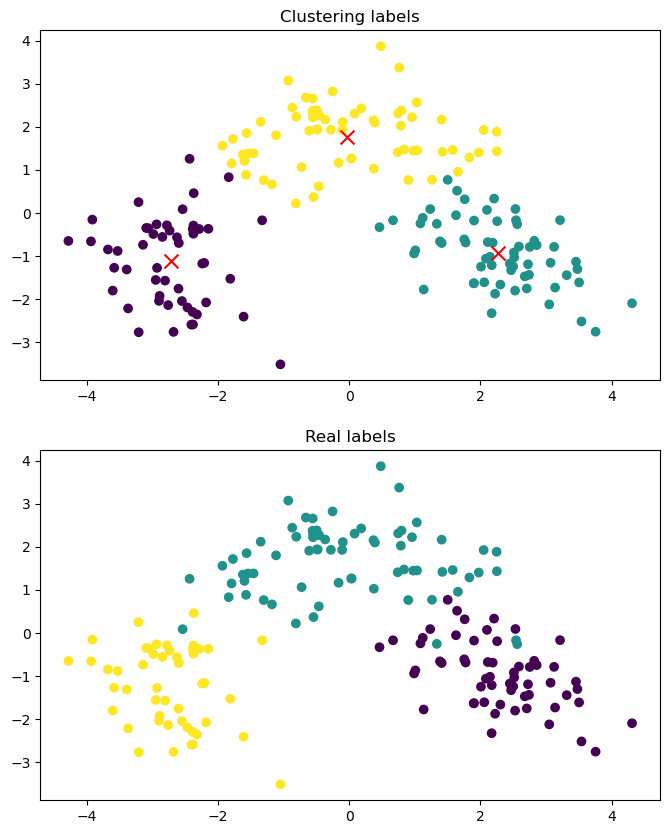

In [194]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10))
ax = ax.ravel()

ax[0].scatter(reduced_df[:, 0], 
            reduced_df[:, 1], 
            c=complete_df.labels);
ax[0].set_title('Clustering labels');
ax[0].scatter(reduced_centroids[:, 0], 
              reduced_centroids[:, 1], 
              c='red', marker='x', s=100);


ax[1].scatter(reduced_df[:, 0], 
            reduced_df[:, 1], 
            c=complete_df.target_var);
ax[1].set_title('Real labels');